# 1. Prepare the Titanic dataset file (download it from Google) 

In [1]:
# import libraries
import numpy as np
import pandas as pd

In [3]:
# import the dataset
data = pd.read_csv("D:\dataset\Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Shape of the dataset
data.shape

(891, 12)

In [4]:
# descriptive information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. Find out the names of passengers younger than 35 years. 

In [52]:
young_passengers = data[data['Age'] < 35]['Name']
print(young_passengers)
    

0                                Braund, Mr. Owen Harris
2                                 Heikkinen, Miss. Laina
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
                             ...                        
884                               Sutehall, Mr. Henry Jr
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 479, dtype: object


In [53]:
# Total passenger younger than 35 years
young_passengers.shape

(479,)

# 3. Print the rows from index 10 to 25 and columns 3 to 5

In [64]:
df = data.iloc[10:26,3:6]
df

,Name,Sex,Age
10,"Sandstrom, Miss. Marguerite Rut",female,4.0
11,"Bonnell, Miss. Elizabeth",female,58.0
12,"Saundercock, Mr. William Henry",male,20.0
13,"Andersson, Mr. Anders Johan",male,39.0
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0
15,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0
16,"Rice, Master. Eugene",male,2.0
17,"Williams, Mr. Charles Eugene",male,NaN
18,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0
19,"Masselmani, Mrs. Fatima",female,NaN


# 4. Find out the statistics aggregate of Age & Fare using the DataFrame.agg() method

In [70]:
agg_dict = {'Age': [np.min, np.max, np.mean, np.median, np.std],
            'Fare': [np.min, np.max, np.mean, np.median, np.std]}

agg_stats = data.agg(agg_dict)
print(agg_stats)

              Age        Fare
amin     0.420000    0.000000
amax    80.000000  512.329200
mean    29.699118   32.204208
median  28.000000   14.454200
std     14.526497   49.693429


# 5. Find out the mean ticket fare price for each of the sex and cabin class combinations

In [71]:
fare_by_sex_class = data.groupby(['Sex', 'Pclass'])['Fare'].mean()
print(fare_by_sex_class)


Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64


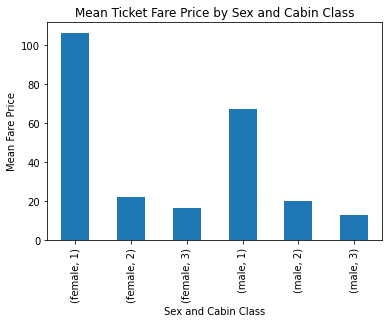

In [72]:
import matplotlib.pyplot as plt

fare_by_sex_class.plot(kind='bar')
plt.title('Mean Ticket Fare Price by Sex and Cabin Class')
plt.xlabel('Sex and Cabin Class')
plt.ylabel('Mean Fare Price')
plt.show()


# Thank You